### Data Ingestion and Format Conversion

In [1]:

import pandas as pd
df = pd.read_csv("cleaned_feather_data.csv")



###  Initial Data Preview

In [2]:
df.head(10)

,application_number,examiner_id,au,app_filing_date,app_last_action_date,app_disposal_type,gender,race,examiner_earliest_date,processing_time
0,8284457,96082.0,1764.0,2000-01-26,2003-01-30,ISS,female,white,2000-01-10,1100
1,8531853,63213.0,1752.0,2000-05-17,2009-03-30,ISS,female,white,2000-01-06,3239
2,8637752,73788.0,1648.0,2001-07-20,2009-09-07,ISS,female,white,2000-01-04,2971
3,8682726,77294.0,1762.0,2000-04-10,2001-04-19,ABN,male,white,2000-01-03,374
4,8687412,68606.0,1734.0,2000-04-28,2001-07-16,ISS,female,white,2000-01-04,444
5,8716371,89557.0,1627.0,2004-01-26,2017-05-15,PEND,female,black,2001-12-19,4858
6,8765941,97543.0,1645.0,2000-06-23,2002-04-03,ABN,female,white,2000-02-08,649
7,8776818,98714.0,1637.0,2000-02-04,2002-11-27,ABN,female,white,2000-01-21,1027
8,8809677,65530.0,1723.0,2002-02-20,2009-03-23,ISS,female,Asian,2000-01-03,2588
9,8836939,77112.0,1755.0,2000-06-13,2006-04-19,ISS,female,white,2000-01-05,2136


In [4]:
import pandas as pd

# Define valid datetime range
min_date = pd.Timestamp("1900-01-01")
max_date = pd.Timestamp("2025-01-01")

# Pre-clean filing date
df["app_filing_date"] = pd.to_datetime(df["app_filing_date"], errors="coerce")
df = df[(df["app_filing_date"] >= min_date) & (df["app_filing_date"] <= max_date)]

# Pre-clean last action date
df["app_last_action_date"] = pd.to_datetime(df["app_last_action_date"], errors="coerce")
df = df[(df["app_last_action_date"] >= min_date) & (df["app_last_action_date"] <= max_date)]

# Calculate processing time
df["processing_time"] = (df["app_last_action_date"] - df["app_filing_date"]).dt.days


### Comprehensive Data Distribution Analysis

Analyze distributions and disparities in the dataset using histograms, boxplots, and count plots.
Insight: Visualization reveals patterns in processing time across gender, race, and disposal type, laying groundwork for fairness analysis.

After dropping NaNs:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710786 entries, 0 to 1710785
Data columns (total 10 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   application_number      int64         
 1   examiner_id             float64       
 2   au                      float64       
 3   app_filing_date         datetime64[ns]
 4   app_last_action_date    datetime64[ns]
 5   app_disposal_type       object        
 6   gender                  object        
 7   race                    object        
 8   examiner_earliest_date  datetime64[ns]
 9   processing_time         int64         
dtypes: datetime64[ns](3), float64(2), int64(2), object(3)
memory usage: 130.5+ MB
None
        application_number   examiner_id            au  \
count         1.710786e+06  1.710786e+06  1.710786e+06   
unique                 NaN           NaN           NaN   
top                    NaN           NaN           NaN   
freq             

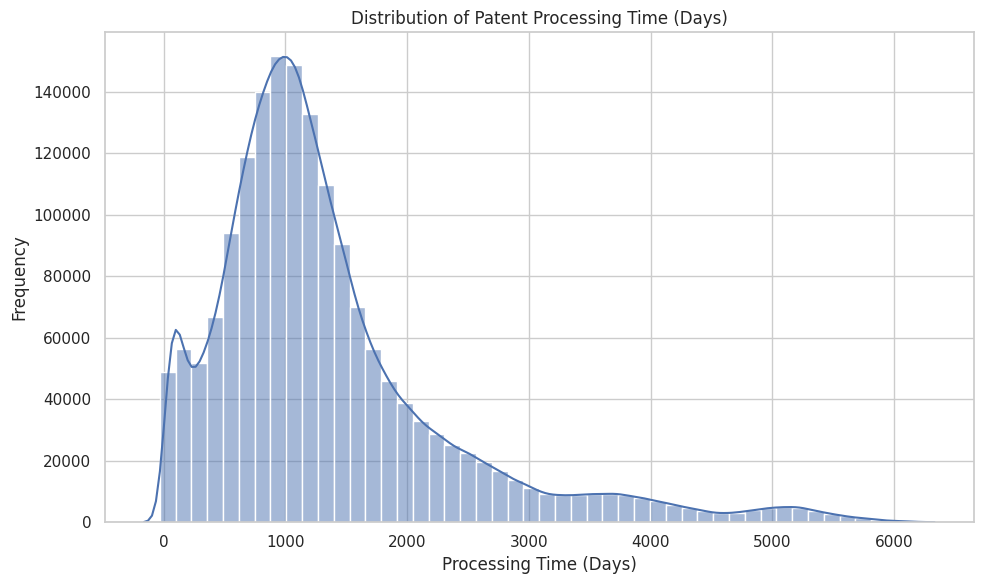

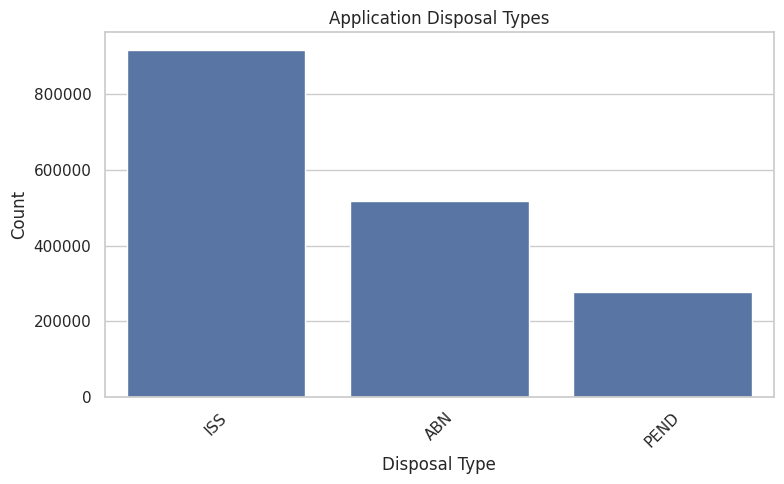

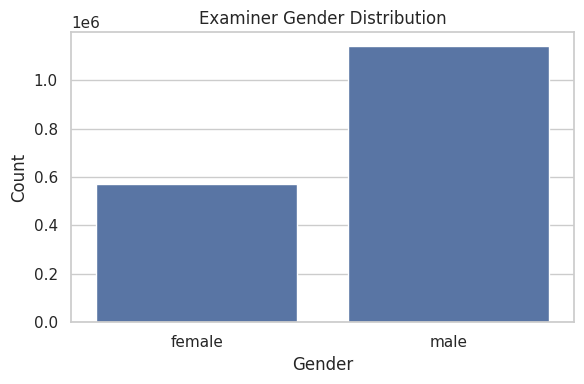

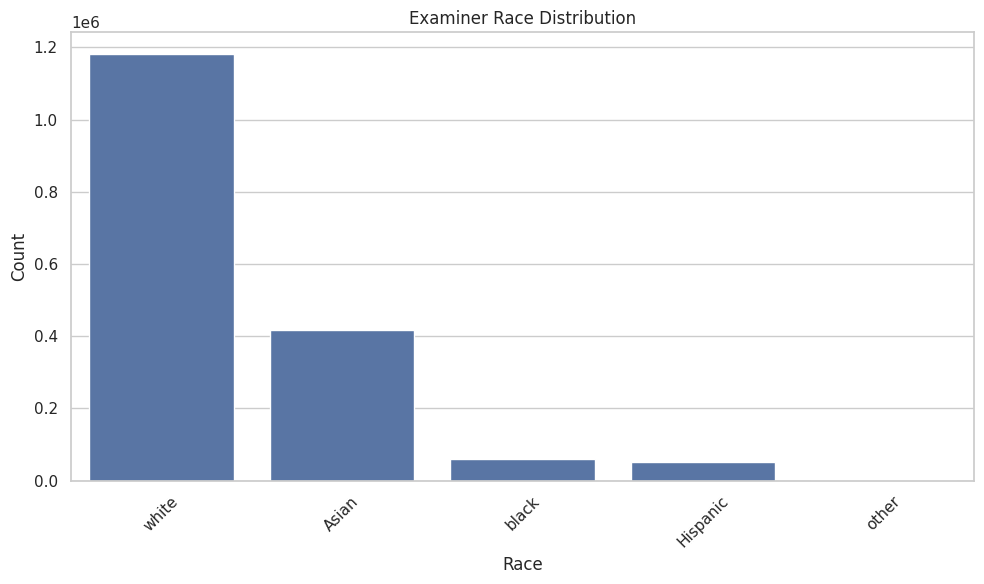

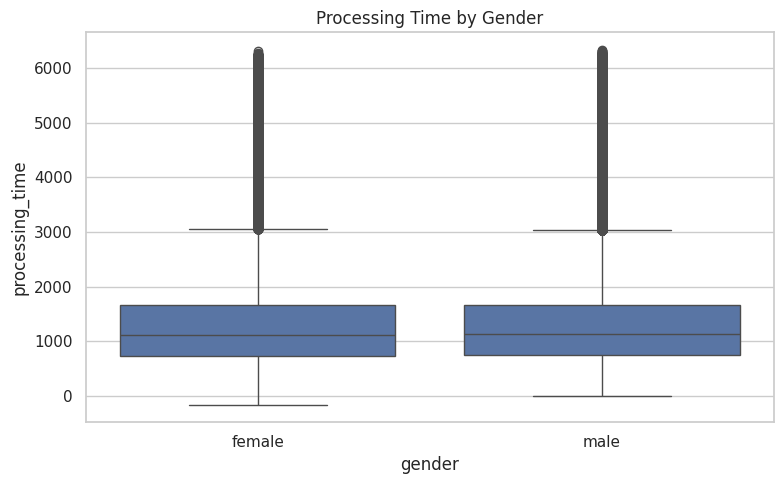

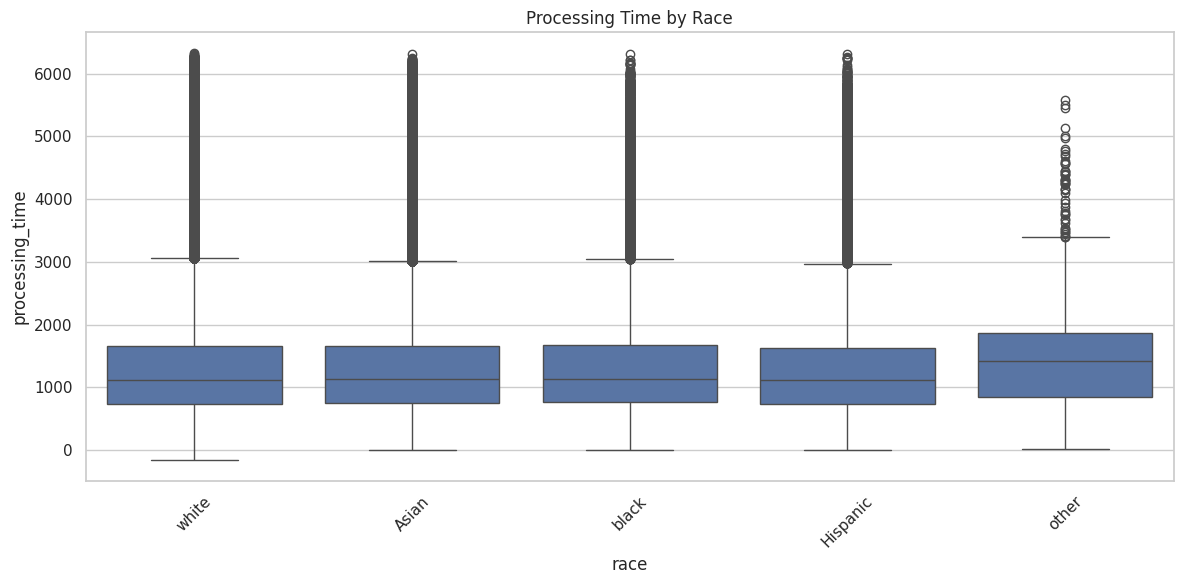

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow.parquet as pq


# Define valid datetime range
min_date = pd.Timestamp("1900-01-01")
max_date = pd.Timestamp("2025-01-01")

# Parse date columns with error coercion
df["app_filing_date"] = pd.to_datetime(df["app_filing_date"], errors="coerce")
df["app_last_action_date"] = pd.to_datetime(df["app_last_action_date"], errors="coerce")
df["examiner_earliest_date"] = pd.to_datetime(df["examiner_earliest_date"], errors="coerce")

# Drop out-of-bounds and invalid dates
df = df[
    (df["app_filing_date"].between(min_date, max_date)) &
    (df["app_last_action_date"].between(min_date, max_date)) &
    (df["examiner_earliest_date"].between(min_date, max_date))
]

# Calculate processing time
df["processing_time"] = (df["app_last_action_date"] - df["app_filing_date"]).dt.days

# Drop all rows with any NaN values
df.dropna(inplace=True)

# ===============================
# SUMMARY: MISSING & STRUCTURE
# ===============================
print("After dropping NaNs:\n")
print(df.info())
print(df.describe(include='all'))

# ===============================
# VISUALIZATIONS
# ===============================
sns.set(style="whitegrid")

# 1. Processing time distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["processing_time"], bins=50, kde=True)
plt.title("Distribution of Patent Processing Time (Days)")
plt.xlabel("Processing Time (Days)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 2. Application disposal type
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="app_disposal_type", order=df["app_disposal_type"].value_counts().index)
plt.title("Application Disposal Types")
plt.xlabel("Disposal Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="gender")
plt.title("Examiner Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 4. Race distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="race", order=df["race"].value_counts().index)
plt.title("Examiner Race Distribution")
plt.xlabel("Race")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Processing time by gender
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="gender", y="processing_time")
plt.title("Processing Time by Gender")
plt.tight_layout()
plt.show()

# 6. Processing time by race
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="race", y="processing_time", order=df["race"].value_counts().index)
plt.title("Processing Time by Race")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###Feature Engineering: AU Grouping
Caption: Create a new feature by grouping art units into broader 3-digit categories.
Insight: Enables subgroup analysis at the AU-group level, useful for detecting structural patterns in examiner behavior.

---



In [ ]:
# Convert AU to string, extract first 2 digits, and prefix with 'au_'
df["au_group"] = "au_" + df["au"].astype(int).astype(str).str[:3]


In [ ]:
df.head()

,application_number,examiner_id,au,app_filing_date,app_last_action_date,app_disposal_type,gender,race,examiner_earliest_date,processing_time,au_group
0,08284457,96082.0,1764.0,2000-01-26,2003-01-30,ISS,female,white,2000-01-10,1100,au_176
2,08531853,63213.0,1752.0,2000-05-17,2009-03-30,ISS,female,white,2000-01-06,3239,au_175
3,08637752,73788.0,1648.0,2001-07-20,2009-09-07,ISS,female,white,2000-01-04,2971,au_164
4,08682726,77294.0,1762.0,2000-04-10,2001-04-19,ABN,male,white,2000-01-03,374,au_176
5,08687412,68606.0,1734.0,2000-04-28,2001-07-16,ISS,female,white,2000-01-04,444,au_173


#Tenure Calculation

In [ ]:
# Ensure dates are in datetime format
df["examiner_earliest_date"] = pd.to_datetime(df["examiner_earliest_date"])
df["app_last_action_date"] = pd.to_datetime(df["app_last_action_date"])

# Step 1: Compute the latest app_last_action_date for each examiner
latest_dates = df.groupby("examiner_id")["app_last_action_date"].max()

# Step 2: Get earliest date (already exists in the dataset), map it
earliest_dates = df.groupby("examiner_id")["examiner_earliest_date"].first()

# Step 3: Compute tenure in days
tenure_days = (latest_dates - earliest_dates).dt.days

# Step 4: Map tenure back to the original DataFrame
df["tenure"] = df["examiner_id"].map(tenure_days)


In [ ]:
df.head(100)


,application_number,examiner_id,au,app_filing_date,app_last_action_date,app_disposal_type,gender,race,examiner_earliest_date,processing_time,tenure
0,08284457,96082.0,1764.0,2000-01-26,2003-01-30,ISS,female,white,2000-01-10,1100.0,5926.0
1,08413193,87678.0,1764.0,2000-10-11,2010-09-27,ISS,None,white,2000-01-04,3638.0,6093.0
2,08531853,63213.0,1752.0,2000-05-17,2009-03-30,ISS,female,white,2000-01-06,3239.0,6344.0
3,08637752,73788.0,1648.0,2001-07-20,2009-09-07,ISS,female,white,2000-01-04,2971.0,6331.0
4,08682726,77294.0,1762.0,2000-04-10,2001-04-19,ABN,male,white,2000-01-03,374.0,6332.0
...,...,...,...,...,...,...,...,...,...,...,...
95,09230594,82563.0,1714.0,2000-02-01,2001-08-27,ISS,male,white,2000-01-05,573.0,6347.0
96,09230607,88202.0,1762.0,2000-06-09,2002-10-07,ABN,female,white,2000-01-10,850.0,6342.0
97,09230640,60130.0,2171.0,2000-06-07,2014-04-25,ISS,male,black,2000-01-10,5070.0,6339.0
98,09230697,85332.0,1746.0,2000-04-17,2005-11-23,ISS,female,Hispanic,2000-01-11,2046.0,6338.0


In [ ]:
import pandas as pd

edges = pd.read_csv("cleaned_edges_sample.csv")
print(edges.columns)


Index(['application_number', 'advice_date', 'ego_examiner_id',
       'alter_examiner_id'],
      dtype='object')


#Network Construction and Centrality Analysis by Demographics

In [ ]:
import networkx as nx


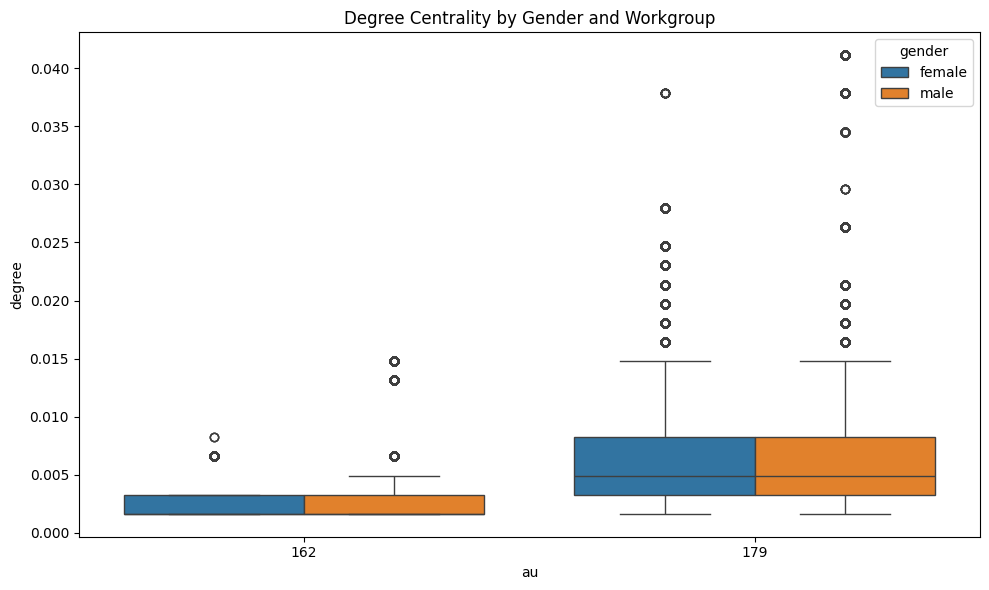

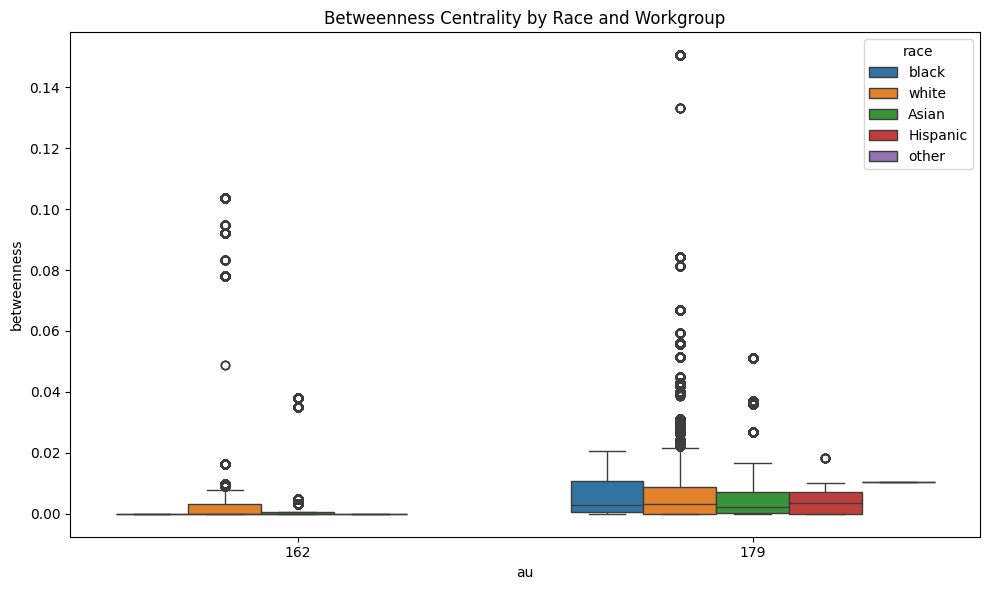

In [ ]:
# Load the CSV versions of the application data and edges
#df = pd.read_csv("app_data_starter_coded_202502.csv")
edges = pd.read_csv("cleaned_edges_sample.csv")

edges.rename(columns={"ego_examiner_id": "source", "alter_examiner_id": "target"}, inplace=True)

# Prepare data: create workgroup column using first 3 digits of 'examiner_art_unit'
df["au"] = df["au"].astype(str).str[:3]

# Filter to top 2 most common workgroups
top_workgroups = df["au"].value_counts().nlargest(2).index.tolist()
df_filtered = df[df["au"].isin(top_workgroups)]

# Restrict edges to nodes within filtered examiners
edges_filtered = edges[
    edges["source"].isin(df_filtered["examiner_id"]) &
    edges["target"].isin(df_filtered["examiner_id"])
]

# Build network graph
G = nx.from_pandas_edgelist(edges_filtered, source="source", target="target")

# Compute centrality measures
centrality = {
    "degree": nx.degree_centrality(G),
    "betweenness": nx.betweenness_centrality(G),
    "closeness": nx.closeness_centrality(G)
}
centrality_df = pd.DataFrame(centrality).reset_index().rename(columns={"index": "examiner_id"})

# Merge with filtered examiner data
df_merged = pd.merge(df_filtered, centrality_df, on="examiner_id", how="left")

import seaborn as sns
import matplotlib.pyplot as plt

# Plot Degree Centrality by Gender and Workgroup
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_merged, x="au", y="degree", hue="gender")
plt.title("Degree Centrality by Gender and Workgroup")
plt.tight_layout()
plt.show()

# Plot Betweenness Centrality by Race and Workgroup
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_merged, x="au", y="betweenness", hue="race")
plt.title("Betweenness Centrality by Race and Workgroup")
plt.tight_layout()
plt.show()


In [ ]:
df.head()

,application_number,examiner_id,au,app_filing_date,app_last_action_date,app_disposal_type,gender,race,examiner_earliest_date,processing_time,tenure
0,08284457,96082.0,176,2000-01-26,2003-01-30,ISS,female,white,2000-01-10,1100.0,5926.0
1,08413193,87678.0,176,2000-10-11,2010-09-27,ISS,None,white,2000-01-04,3638.0,6093.0
2,08531853,63213.0,175,2000-05-17,2009-03-30,ISS,female,white,2000-01-06,3239.0,6344.0
3,08637752,73788.0,164,2001-07-20,2009-09-07,ISS,female,white,2000-01-04,2971.0,6331.0
4,08682726,77294.0,176,2000-04-10,2001-04-19,ABN,male,white,2000-01-03,374.0,6332.0


In [ ]:
G = nx.from_pandas_edgelist(edges_filtered, source="source", target="target")


In [ ]:
df.head()

,application_number,examiner_id,au,app_filing_date,app_last_action_date,app_disposal_type,gender,race,examiner_earliest_date,processing_time,tenure
0,08284457,96082.0,176,2000-01-26,2003-01-30,ISS,female,white,2000-01-10,1100.0,5926.0
1,08413193,87678.0,176,2000-10-11,2010-09-27,ISS,None,white,2000-01-04,3638.0,6093.0
2,08531853,63213.0,175,2000-05-17,2009-03-30,ISS,female,white,2000-01-06,3239.0,6344.0
3,08637752,73788.0,164,2001-07-20,2009-09-07,ISS,female,white,2000-01-04,2971.0,6331.0
4,08682726,77294.0,176,2000-04-10,2001-04-19,ABN,male,white,2000-01-03,374.0,6332.0


#Scalable Network Analysis on Sampled Examiner Groups

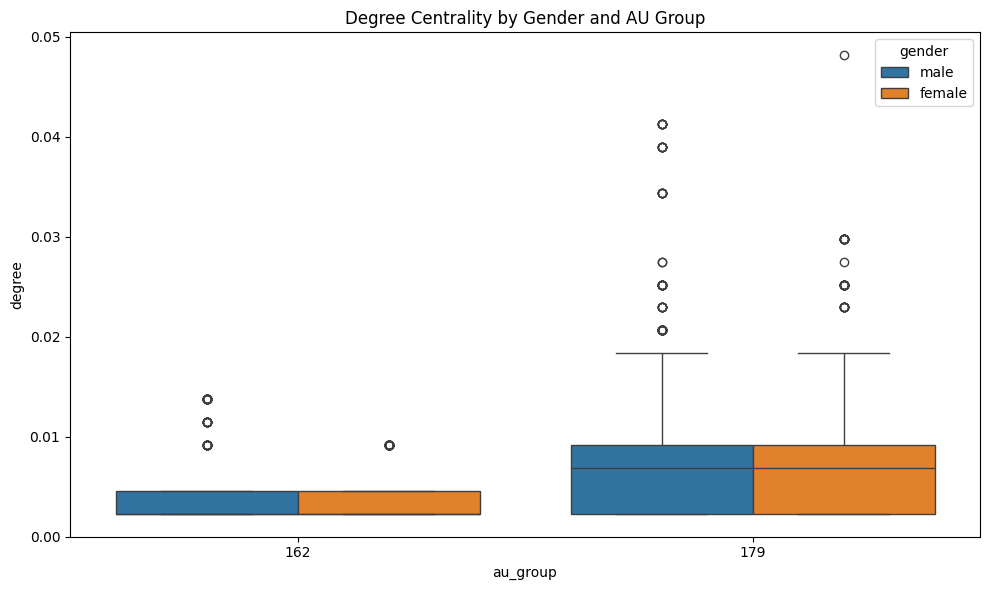

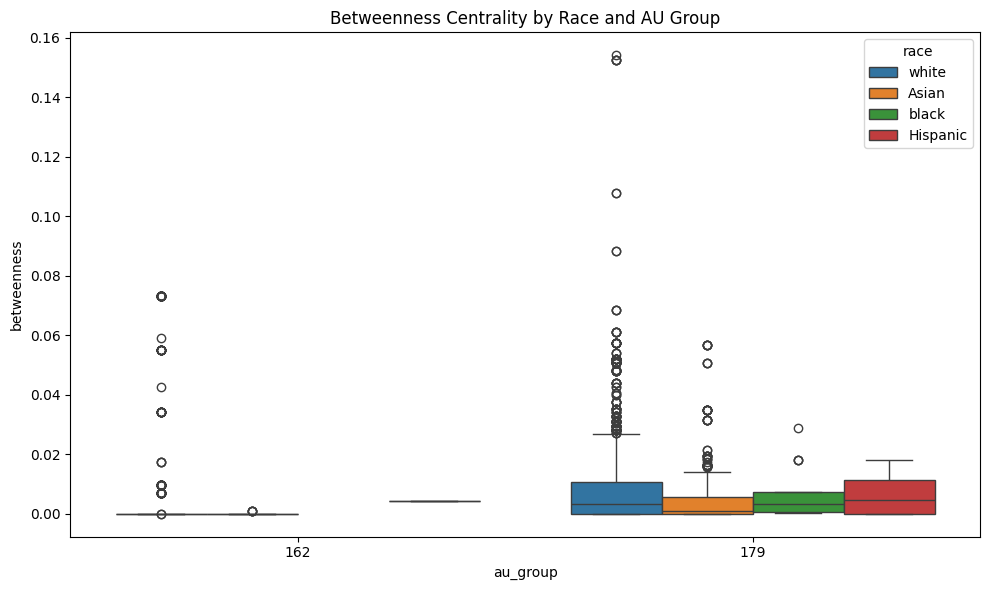

In [ ]:
# Load only required columns
required_columns = [
    "examiner_id", "au", "gender", "race",
    "app_last_action_date", "examiner_earliest_date"
]
#df = pd.read_csv("app_data_starter_coded_202502.csv", usecols=required_columns)

# Drop all NaNs immediately
df = df.dropna()

# Format date columns
df["app_last_action_date"] = pd.to_datetime(df["app_last_action_date"], errors="coerce")
df["examiner_earliest_date"] = pd.to_datetime(df["examiner_earliest_date"], errors="coerce")
df = df.dropna(subset=["app_last_action_date", "examiner_earliest_date"])

# Define 'au_group' from first 3 digits of 'au'
df["au_group"] = df["au"].astype(str).str[:3]

# Define 'tenure' = app_last_action_date - examiner_earliest_date (in days)
df["tenure"] = (df["app_last_action_date"] - df["examiner_earliest_date"]).dt.days

# Filter top 2 au_groups
top_groups = df["au_group"].value_counts().nlargest(2).index.tolist()
df_filtered = df[df["au_group"].isin(top_groups)]

# Sample 5000 rows to control memory usage
df_sampled = df_filtered.sample(n=5000, random_state=42)

# Load and rename edges
edges = pd.read_csv("cleaned_edges_sample.csv")
edges.rename(columns={"ego_examiner_id": "source", "alter_examiner_id": "target"}, inplace=True)

# Filter edges to those within sampled examiners
edges_filtered = edges[
    edges["source"].isin(df_sampled["examiner_id"]) &
    edges["target"].isin(df_sampled["examiner_id"])
]

# Build network graph
G = nx.from_pandas_edgelist(edges_filtered, source="source", target="target")

# Compute centrality measures
centrality = {
    "degree": nx.degree_centrality(G),
    "betweenness": nx.betweenness_centrality(G),
    "closeness": nx.closeness_centrality(G)
}
centrality_df = pd.DataFrame(centrality).reset_index().rename(columns={"index": "examiner_id"})

# Merge centrality metrics back to sampled data
df_merged = pd.merge(df_sampled, centrality_df, on="examiner_id", how="left")

# Plot: Degree Centrality by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_merged, x="au_group", y="degree", hue="gender")
plt.title("Degree Centrality by Gender and AU Group")
plt.tight_layout()
plt.show()

# Plot: Betweenness Centrality by Race
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_merged, x="au_group", y="betweenness", hue="race")
plt.title("Betweenness Centrality by Race and AU Group")
plt.tight_layout()
plt.show()


In [ ]:
df.head()

,application_number,examiner_id,au,app_filing_date,app_last_action_date,app_disposal_type,gender,race,examiner_earliest_date,processing_time,tenure,au_group
0,08284457,96082.0,176,2000-01-26,2003-01-30,ISS,female,white,2000-01-10,1100.0,1116,176
2,08531853,63213.0,175,2000-05-17,2009-03-30,ISS,female,white,2000-01-06,3239.0,3371,175
3,08637752,73788.0,164,2001-07-20,2009-09-07,ISS,female,white,2000-01-04,2971.0,3534,164
4,08682726,77294.0,176,2000-04-10,2001-04-19,ABN,male,white,2000-01-03,374.0,472,176
5,08687412,68606.0,173,2000-04-28,2001-07-16,ISS,female,white,2000-01-04,444.0,559,173


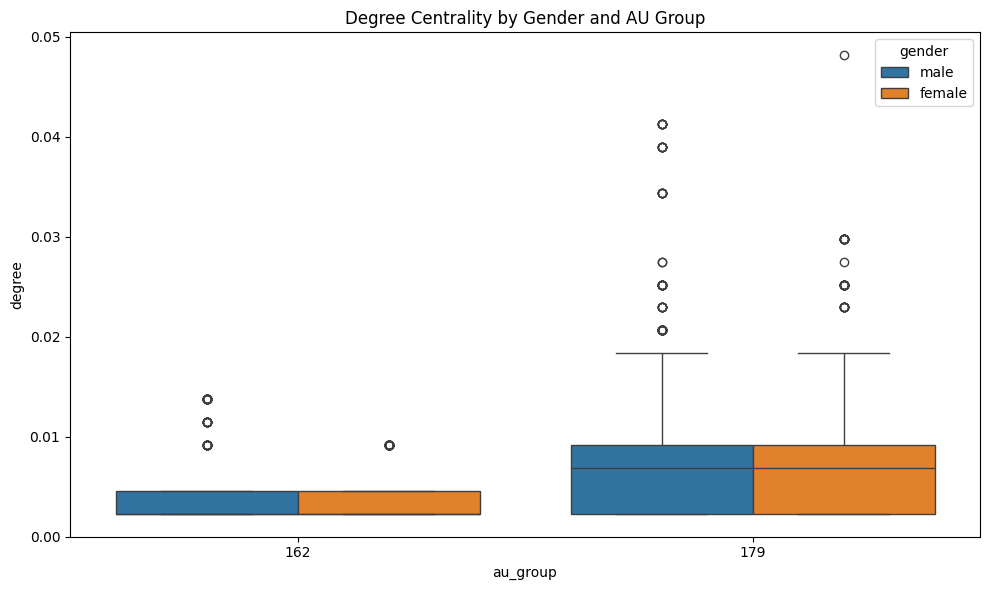

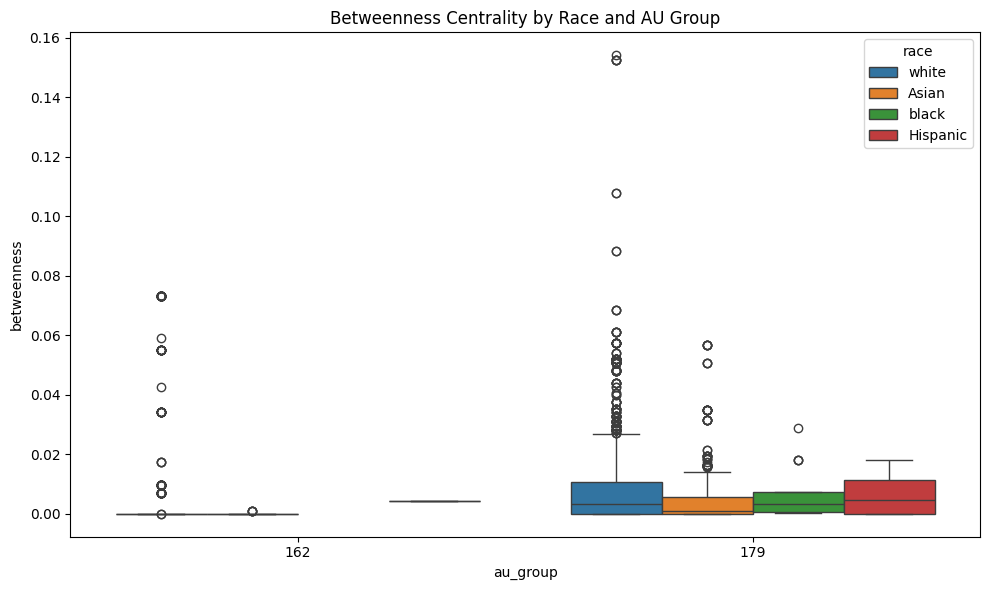

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# ================================
# STEP 1: LOAD & CLEAN DATA
# ================================
required_columns = [
    "examiner_id", "au", "gender", "race",
    "app_last_action_date", "examiner_earliest_date"
]
#df = pd.read_csv("app_data_starter_coded_202502.csv", usecols=required_columns)

# Drop rows with any NaNs
df = df.dropna()

# Convert date columns
df["app_last_action_date"] = pd.to_datetime(df["app_last_action_date"], errors="coerce")
df["examiner_earliest_date"] = pd.to_datetime(df["examiner_earliest_date"], errors="coerce")
df = df.dropna(subset=["app_last_action_date", "examiner_earliest_date"])

# Create au_group (first 3 digits of 'au')
df["au_group"] = df["au"].astype(str).str[:3]

# Compute tenure per examiner = max(app_last_action_date) - examiner_earliest_date
latest_action = df.groupby("examiner_id")["app_last_action_date"].max().reset_index()
latest_action.rename(columns={"app_last_action_date": "latest_action_date"}, inplace=True)
df = pd.merge(df, latest_action, on="examiner_id", how="left")
df["tenure"] = (df["latest_action_date"] - df["examiner_earliest_date"]).dt.days

# Filter to top 2 most common au_groups
top_groups = df["au_group"].value_counts().nlargest(2).index.tolist()
df_filtered = df[df["au_group"].isin(top_groups)]

# Sample to manage memory
df_sampled = df_filtered.sample(n=5000, random_state=42)

# ================================
# STEP 2: LOAD NETWORK & ANALYZE
# ================================
edges = pd.read_csv("cleaned_edges_sample.csv")
edges.rename(columns={"ego_examiner_id": "source", "alter_examiner_id": "target"}, inplace=True)

# Filter edges to those between sampled examiners
edges_filtered = edges[
    edges["source"].isin(df_sampled["examiner_id"]) &
    edges["target"].isin(df_sampled["examiner_id"])
]

# Build graph
G = nx.from_pandas_edgelist(edges_filtered, source="source", target="target")

# Compute centrality metrics
centrality = {
    "degree": nx.degree_centrality(G),
    "betweenness": nx.betweenness_centrality(G),
    "closeness": nx.closeness_centrality(G)
}
centrality_df = pd.DataFrame(centrality).reset_index().rename(columns={"index": "examiner_id"})

# Merge centrality metrics
df_merged = pd.merge(df_sampled, centrality_df, on="examiner_id", how="left")

# ================================
# STEP 3: VISUALIZATION
# ================================
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_merged, x="au_group", y="degree", hue="gender")
plt.title("Degree Centrality by Gender and AU Group")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_merged, x="au_group", y="betweenness", hue="race")
plt.title("Betweenness Centrality by Race and AU Group")
plt.tight_layout()
plt.show()


In [ ]:
df.head()

,application_number,examiner_id,au,app_filing_date,app_last_action_date,app_disposal_type,gender,race,examiner_earliest_date,processing_time,tenure,au_group,latest_action_date_x,latest_action_date_y,latest_action_date
0,08284457,96082.0,176,2000-01-26,2003-01-30,ISS,female,white,2000-01-10,1100.0,5926,176,2016-04-01,2016-04-01,2016-04-01
1,08531853,63213.0,175,2000-05-17,2009-03-30,ISS,female,white,2000-01-06,3239.0,6344,175,2017-05-20,2017-05-20,2017-05-20
2,08637752,73788.0,164,2001-07-20,2009-09-07,ISS,female,white,2000-01-04,2971.0,6331,164,2017-05-05,2017-05-05,2017-05-05
3,08682726,77294.0,176,2000-04-10,2001-04-19,ABN,male,white,2000-01-03,374.0,6332,176,2017-05-05,2017-05-05,2017-05-05
4,08687412,68606.0,173,2000-04-28,2001-07-16,ISS,female,white,2000-01-04,444.0,6345,173,2017-05-19,2017-05-19,2017-05-19


#Tenure-Aware Network Centrality Analysis with Demographic Breakdown
This section enhances centrality analysis by incorporating examiner tenure as a weight into the advice network. After cleaning and structuring the data, an unweighted graph is built to compute basic centrality measures (degree, betweenness, closeness). A second weighted graph is constructed using examiner tenure, and a custom tenure-weighted degree centrality is computed to reflect influence adjusted for experience.

The centrality metrics are then merged with demographic data, and extensive visualizations are generated:

Distribution of gender, race, and tenure.

Correlation heatmap between tenure and network metrics.

Boxplots comparing gender/race-based disparities across AU groups using both standard and tenure-weighted metrics.

This provides a deeper, more nuanced understanding of social positioning within the examiner network, factoring in experience.

<ipython-input-33-4a20a79df2f6>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edges_filtered["weight"] = edges_filtered["source"].map(tenure_dict)


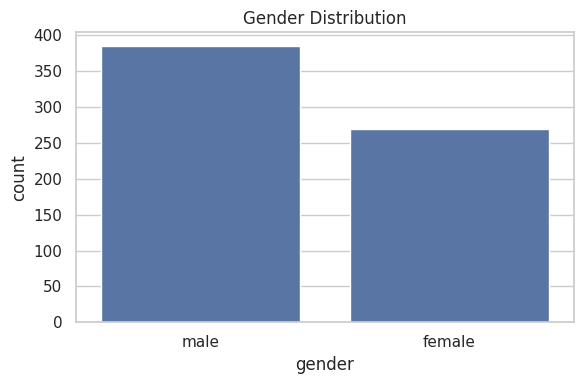

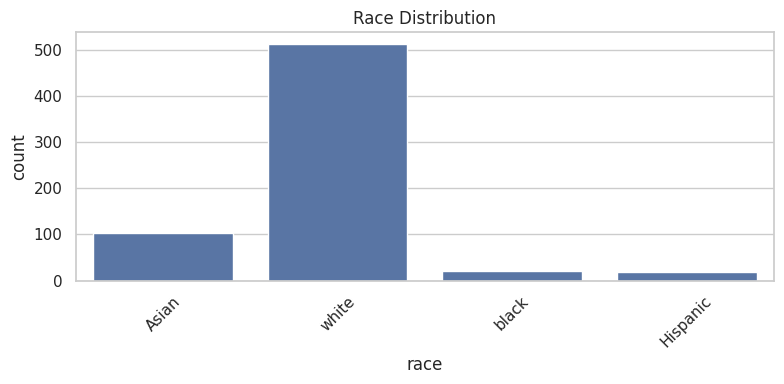

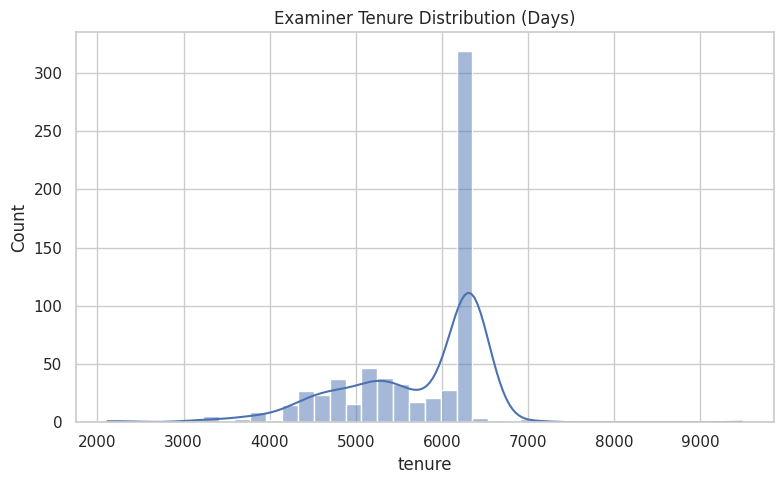

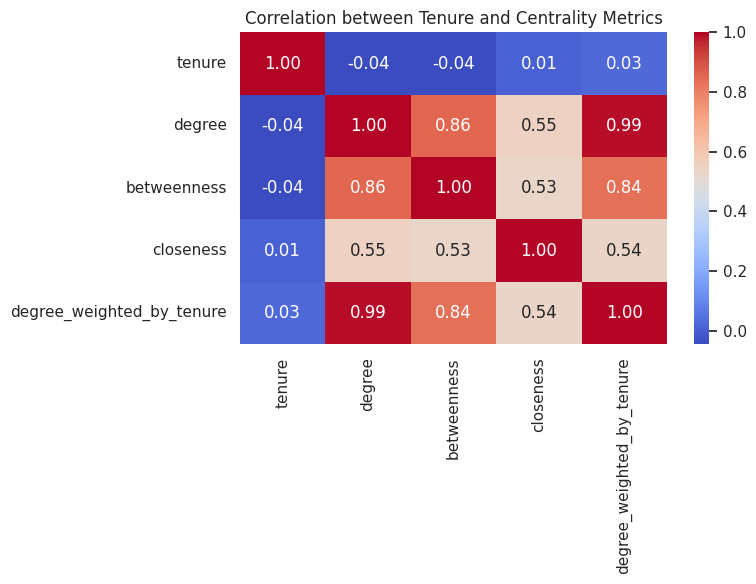

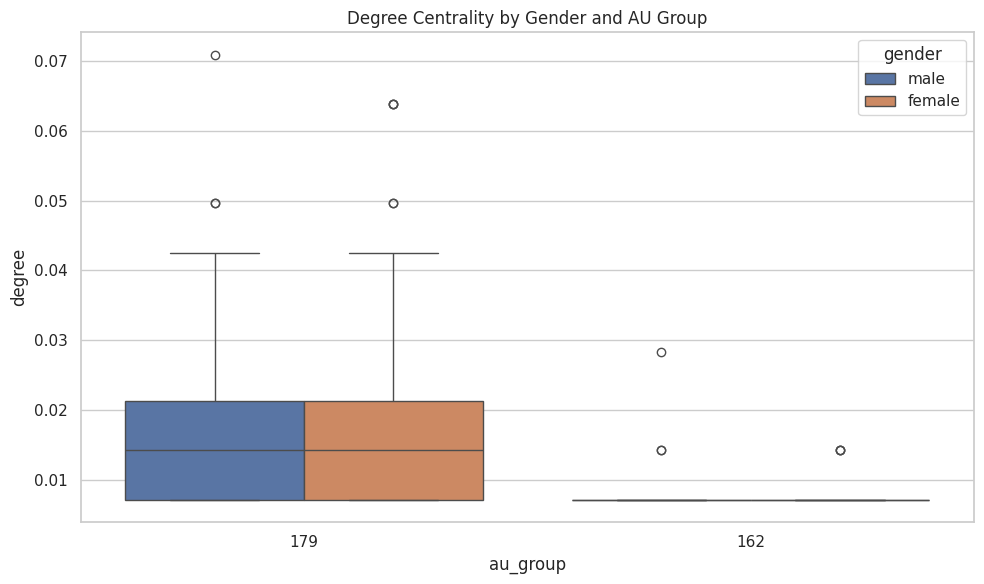

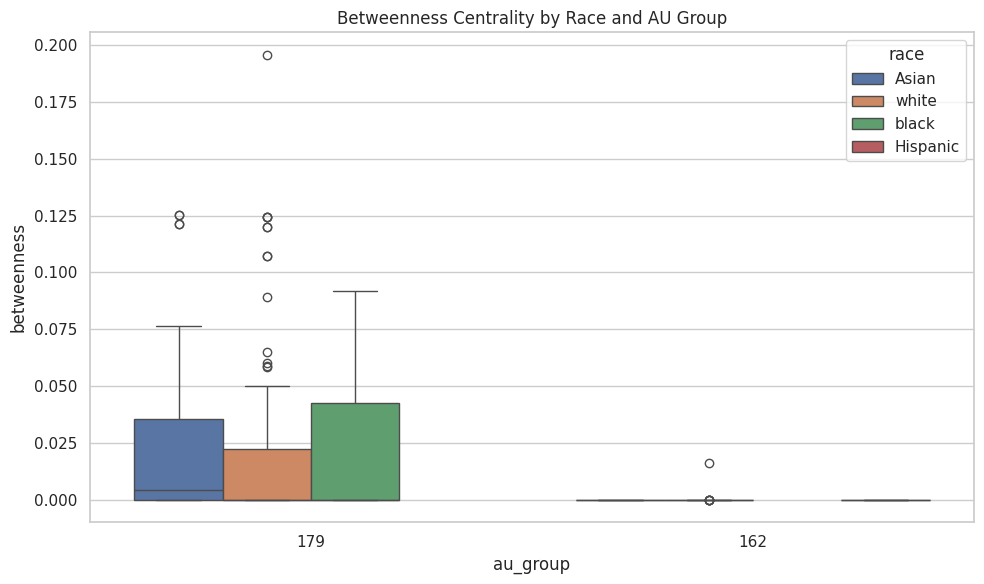

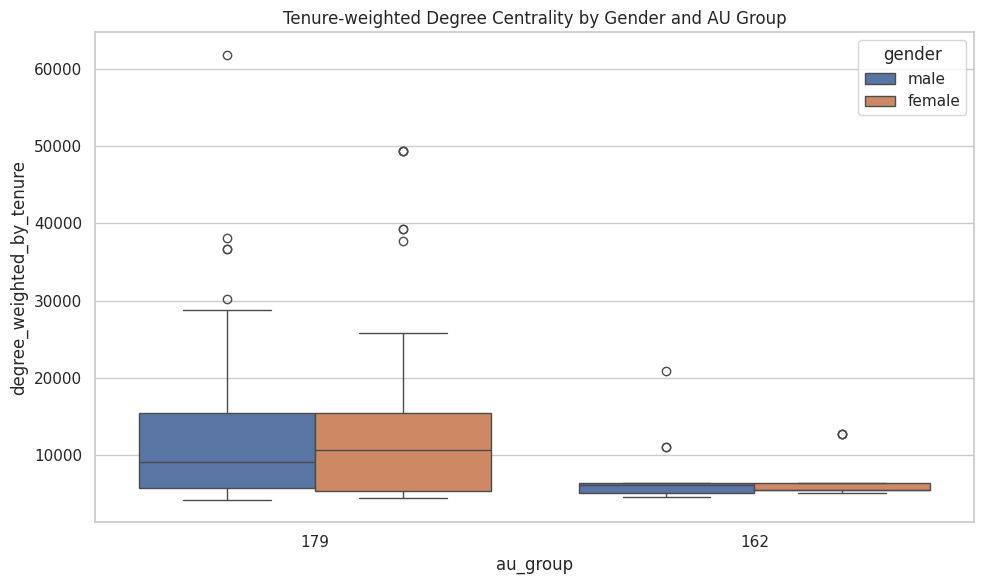

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: Load and Clean Data
cols = ["examiner_id", "au", "gender", "race", "app_last_action_date", "examiner_earliest_date"]
##df = pd.read_csv("app_data_starter_coded_202502.csv", usecols=cols)


# Convert date columns
df["app_last_action_date"] = pd.to_datetime(df["app_last_action_date"], errors="coerce")
df["examiner_earliest_date"] = pd.to_datetime(df["examiner_earliest_date"], errors="coerce")
df = df.dropna(subset=["app_last_action_date", "examiner_earliest_date"])

# Create 'au_group'
df["au_group"] = df["au"].astype(str).str[:3]

# Calculate tenure = max(app_last_action_date) - earliest date per examiner
latest_action = df.groupby("examiner_id")["app_last_action_date"].max().reset_index()
latest_action.rename(columns={"app_last_action_date": "latest_action_date"}, inplace=True)
#df = pd.merge(df, latest_action, on="examiner_id", how="left")
df["tenure"] = (df["latest_action_date"] - df["examiner_earliest_date"]).dt.days

# Focus on top 2 AU groups
top_groups = df["au_group"].value_counts().nlargest(2).index.tolist()
df = df[df["au_group"].isin(top_groups)]

# STEP 2: Load and Process Advice Network
edges = pd.read_csv("cleaned_edges_sample.csv")
edges.rename(columns={"ego_examiner_id": "source", "alter_examiner_id": "target"}, inplace=True)
edges_filtered = edges[
    edges["source"].isin(df["examiner_id"]) &
    edges["target"].isin(df["examiner_id"])
]

# Build Graph (Unweighted)
G = nx.from_pandas_edgelist(edges_filtered, source="source", target="target")

# Centrality (unweighted)
centrality = {
    "degree": nx.degree_centrality(G),
    "betweenness": nx.betweenness_centrality(G),
    "closeness": nx.closeness_centrality(G)
}
centrality_df = pd.DataFrame(centrality).reset_index().rename(columns={"index": "examiner_id"})

# STEP 2B: Tenure-weighted Centrality
tenure_dict = df.set_index("examiner_id")["tenure"].to_dict()
edges_filtered["weight"] = edges_filtered["source"].map(tenure_dict)
G_weighted = nx.from_pandas_edgelist(edges_filtered, source="source", target="target", edge_attr="weight")

degree_weighted = {
    n: sum(d["weight"] for _, _, d in G_weighted.edges(n, data=True))
    for n in G_weighted.nodes
}
centrality_df["degree_weighted_by_tenure"] = centrality_df["examiner_id"].map(degree_weighted)

# Merge metrics
df = pd.merge(df, centrality_df, on="examiner_id", how="left")

# STEP 3: EDA Visualizations
sns.set(style="whitegrid")

# Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="gender")
plt.title("Gender Distribution")
plt.tight_layout()
plt.show()

# Race Distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="race")
plt.title("Race Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Tenure Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["tenure"], bins=40, kde=True)
plt.title("Examiner Tenure Distribution (Days)")
plt.tight_layout()
plt.show()

# Correlation Heatmap
corr = df[["tenure", "degree", "betweenness", "closeness", "degree_weighted_by_tenure"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Tenure and Centrality Metrics")
plt.tight_layout()
plt.show()

# Degree by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="au_group", y="degree", hue="gender")
plt.title("Degree Centrality by Gender and AU Group")
plt.tight_layout()
plt.show()

# Betweenness by Race
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="au_group", y="betweenness", hue="race")
plt.title("Betweenness Centrality by Race and AU Group")
plt.tight_layout()
plt.show()

# Tenure-weighted Degree by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="au_group", y="degree_weighted_by_tenure", hue="gender")
plt.title("Tenure-weighted Degree Centrality by Gender and AU Group")
plt.tight_layout()
plt.show()


In [ ]:
df.head(100)

,application_number,examiner_id,au,app_filing_date,app_last_action_date,app_disposal_type,gender,race,examiner_earliest_date,processing_time,tenure,au_group,latest_action_date_x,latest_action_date_y,latest_action_date,degree,betweenness,closeness,degree_weighted_by_tenure
0,13362204,59721.0,179,2012-01-31,2016-06-15,ISS,male,Asian,2007-08-23,1597.0,3560,179,2017-05-22,2017-05-22,2017-05-22,NaN,NaN,NaN,NaN
1,10823795,60397.0,179,2004-04-14,2009-10-09,ABN,male,white,2000-01-06,2004.0,6347,179,2017-05-23,2017-05-23,2017-05-23,NaN,NaN,NaN,NaN
2,12497583,61529.0,162,2009-07-03,2014-11-19,ISS,female,Asian,2000-01-05,1965.0,6344,162,2017-05-19,2017-05-19,2017-05-19,NaN,NaN,NaN,NaN
3,14649759,99317.0,162,2015-06-04,2017-01-31,PEND,female,black,2002-05-07,607.0,5490,162,2017-05-18,2017-05-18,2017-05-18,NaN,NaN,NaN,NaN
4,09883033,60059.0,162,2001-06-15,2005-03-16,ISS,male,white,2000-01-18,1370.0,6282,162,2017-03-31,2017-03-31,2017-03-31,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12991436,59632.0,162,2010-11-15,2011-06-29,ISS,female,white,2000-01-18,226.0,6335,162,2017-05-23,2017-05-23,2017-05-23,NaN,NaN,NaN,NaN
96,11199002,66582.0,179,2005-08-08,2010-01-04,ABN,male,white,2000-01-07,1610.0,6328,179,2017-05-05,2017-05-05,2017-05-05,0.014184,0.000101,0.014184,10423.0
97,11150778,59447.0,179,2005-06-09,2009-08-25,ABN,female,white,2001-12-04,1538.0,5649,179,2017-05-23,2017-05-23,2017-05-23,0.014184,0.000101,0.014184,11298.0
98,13729930,71657.0,179,2012-12-28,2017-04-02,ABN,male,white,2000-01-03,1556.0,6346,179,2017-05-19,2017-05-19,2017-05-19,NaN,NaN,NaN,NaN


In [ ]:
df.head()


,application_number,examiner_id,au,app_filing_date,app_last_action_date,app_disposal_type,gender,race,examiner_earliest_date,processing_time,tenure,au_group,latest_action_date_x,latest_action_date_y,latest_action_date,degree,betweenness,closeness,degree_weighted_by_tenure
0,13362204,59721.0,179,2012-01-31,2016-06-15,ISS,male,Asian,2007-08-23,1597.0,3560,179,2017-05-22,2017-05-22,2017-05-22,NaN,NaN,NaN,NaN
1,10823795,60397.0,179,2004-04-14,2009-10-09,ABN,male,white,2000-01-06,2004.0,6347,179,2017-05-23,2017-05-23,2017-05-23,NaN,NaN,NaN,NaN
2,12497583,61529.0,162,2009-07-03,2014-11-19,ISS,female,Asian,2000-01-05,1965.0,6344,162,2017-05-19,2017-05-19,2017-05-19,NaN,NaN,NaN,NaN
3,14649759,99317.0,162,2015-06-04,2017-01-31,PEND,female,black,2002-05-07,607.0,5490,162,2017-05-18,2017-05-18,2017-05-18,NaN,NaN,NaN,NaN
4,09883033,60059.0,162,2001-06-15,2005-03-16,ISS,male,white,2000-01-18,1370.0,6282,162,2017-03-31,2017-03-31,2017-03-31,NaN,NaN,NaN,NaN


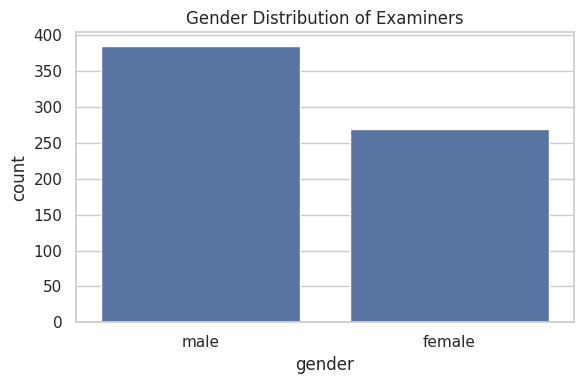

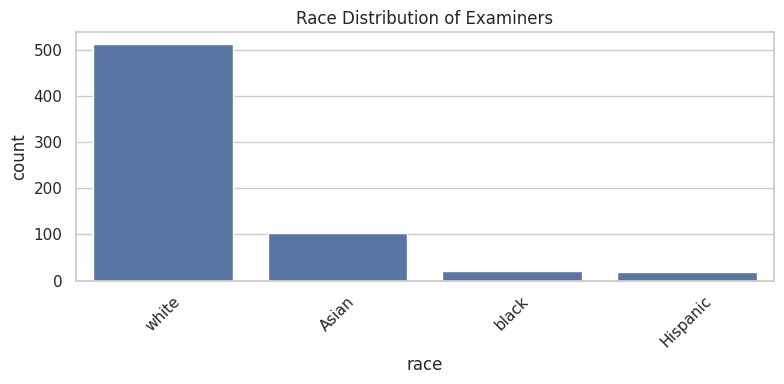

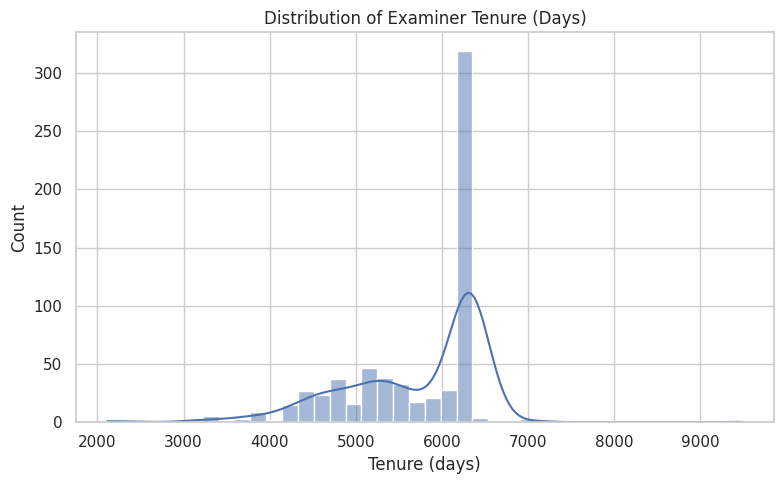

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="gender")
plt.title("Gender Distribution of Examiners")
plt.tight_layout()
plt.show()

# Race distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="race", order=df["race"].value_counts().index)
plt.title("Race Distribution of Examiners")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Tenure distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["tenure"], bins=40, kde=True)
plt.title("Distribution of Examiner Tenure (Days)")
plt.xlabel("Tenure (days)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
# Recreate au_group column if it's missing
if "au_group" not in df.columns:
    df["au_group"] = df["au"].astype(str).str[:3]






In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm


In [ ]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   application_number         655 non-null    object        
 1   examiner_id                655 non-null    float64       
 2   au                         655 non-null    object        
 3   app_filing_date            655 non-null    datetime64[ns]
 4   app_last_action_date       655 non-null    datetime64[ns]
 5   app_disposal_type          655 non-null    object        
 6   gender                     655 non-null    object        
 7   race                       655 non-null    object        
 8   examiner_earliest_date     655 non-null    datetime64[ns]
 9   processing_time            655 non-null    float64       
 10  tenure                     655 non-null    int64         
 11  au_group                   655 non-null    object        
 12  latest_a

#Regression Analysis: Impact of Gender and Tenure on Processing Time
This section prepares the final cleaned dataset and runs an Ordinary Least Squares (OLS) regression to model how examiner gender and tenure influence app_proc_time (i.e., patent processing time).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Ensure datetime columns are parsed correctly
df['app_proc_time'] = (df['latest_action_date_y'] - df['app_filing_date']).dt.days

# Drop NaNs just for required analysis columns
df = df.dropna(subset=['app_proc_time', 'gender'])

# Rename gender to examiner_gender if needed
df['gender'] = df['gender'].astype('category')

# Optional: include these if they exist in your df
if 'tenure' in df.columns:
    df['tenure'] = df['tenure'].fillna(df['tenure'].median())
if 'processing_time' in df.columns:
    df['num_applications'] = df.groupby('examiner_id')['application_number'].transform('count')


In [ ]:
df.head()

,application_number,examiner_id,au,app_filing_date,app_last_action_date,app_disposal_type,gender,race,examiner_earliest_date,processing_time,...,au_group,latest_action_date_x,latest_action_date_y,latest_action_date,degree,betweenness,closeness,degree_weighted_by_tenure,app_proc_time,num_applications
0,13362204,59721.0,179,2012-01-31,2016-06-15,ISS,male,Asian,2007-08-23,1597.0,...,179,2017-05-22,2017-05-22,2017-05-22,NaN,NaN,NaN,NaN,1938,1
1,10823795,60397.0,179,2004-04-14,2009-10-09,ABN,male,white,2000-01-06,2004.0,...,179,2017-05-23,2017-05-23,2017-05-23,NaN,NaN,NaN,NaN,4787,2
2,12497583,61529.0,162,2009-07-03,2014-11-19,ISS,female,Asian,2000-01-05,1965.0,...,162,2017-05-19,2017-05-19,2017-05-19,NaN,NaN,NaN,NaN,2877,1
3,14649759,99317.0,162,2015-06-04,2017-01-31,PEND,female,black,2002-05-07,607.0,...,162,2017-05-18,2017-05-18,2017-05-18,NaN,NaN,NaN,NaN,714,3
4,09883033,60059.0,162,2001-06-15,2005-03-16,ISS,male,white,2000-01-18,1370.0,...,162,2017-03-31,2017-03-31,2017-03-31,NaN,NaN,NaN,NaN,5768,1


In [ ]:
df.to_csv("ONA_final_cleaned_dataset.csv", index=False)

In [ ]:
model1 = smf.ols('app_proc_time ~ C(gender) + tenure + processing_time', data=df).fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:          app_proc_time   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     138.7
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           1.76e-69
Time:                        19:09:01   Log-Likelihood:                -5570.5
No. Observations:                 655   AIC:                         1.115e+04
Df Residuals:                     651   BIC:                         1.117e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -649.8287    333.29

In [ ]:
# Load the edge list to create centrality from it
edges_path = "cleaned_edges_sample.csv"
edges_df = pd.read_csv(edges_path)


In [ ]:
edges_df.head()

,application_number,advice_date,ego_examiner_id,alter_examiner_id
0,9402488,2008-11-17,84356.0,66266.0
1,9402488,2008-11-17,84356.0,63519.0
2,9402488,2008-11-17,84356.0,98531.0
3,9445135,2008-08-21,92953.0,71313.0
4,9445135,2008-08-21,92953.0,93865.0


In [ ]:
# Use correct column names from edges dataset to create the graph
G = nx.from_pandas_edgelist(edges_df, source='ego_examiner_id', target='alter_examiner_id', create_using=nx.Graph())

# Compute degree centrality
centrality_dict = nx.degree_centrality(G)

# Convert to DataFrame
centrality_df = pd.DataFrame.from_dict(centrality_dict, orient='index', columns=['centrality']).reset_index()
centrality_df.rename(columns={'index': 'examiner_id'}, inplace=True)

# Convert to float to ensure match with main DataFrame
centrality_df['examiner_id'] = centrality_df['examiner_id'].astype(float)

centrality_df.head()

,examiner_id,centrality
0,84356.0,0.002943
1,66266.0,0.006621
2,63519.0,0.005885
3,98531.0,0.000736
4,92953.0,0.001226


In [ ]:
# Merge centrality scores into main dataset on 'examiner_id'
df = df.merge(centrality_df, on='examiner_id', how='left')

# Drop rows with missing centrality values (i.e., unmatched examiners)
df = df.dropna(subset=['centrality'])

# Confirm centrality column is added
df[['examiner_id', 'centrality']].head()

,examiner_id,centrality
1,60397.0,0.000245
2,61529.0,0.000490
7,92836.0,0.001717
9,94035.0,0.000981
10,69896.0,0.000490


In [ ]:
df.head()

,application_number,examiner_id,au,app_filing_date,app_last_action_date,app_disposal_type,gender,race,examiner_earliest_date,processing_time,...,latest_action_date_x,latest_action_date_y,latest_action_date,degree,betweenness,closeness,degree_weighted_by_tenure,app_proc_time,num_applications,centrality
1,10823795,60397.0,179,2004-04-14,2009-10-09,ABN,male,white,2000-01-06,2004.0,...,2017-05-23,2017-05-23,2017-05-23,NaN,NaN,NaN,NaN,4787,2,0.000245
2,12497583,61529.0,162,2009-07-03,2014-11-19,ISS,female,Asian,2000-01-05,1965.0,...,2017-05-19,2017-05-19,2017-05-19,NaN,NaN,NaN,NaN,2877,1,0.000490
7,11294796,92836.0,179,2005-12-06,2008-06-04,ISS,female,white,2000-01-19,911.0,...,2017-05-19,2017-05-19,2017-05-19,0.007092,0.000000,0.007092,5334.0,4182,1,0.001717
9,12986112,94035.0,179,2011-01-06,2017-01-18,ISS,male,Asian,2005-03-31,2204.0,...,2017-05-19,2017-05-19,2017-05-19,0.028369,0.039007,0.147268,17728.0,2325,1,0.000981
10,12518073,69896.0,162,2010-08-05,2012-12-03,ABN,male,white,2004-03-31,851.0,...,2017-01-19,2017-01-19,2017-01-19,NaN,NaN,NaN,NaN,2359,2,0.000490


#Regression Models with Network Centrality Effects and Interaction Terms
This section extends the previous regression by introducing network centrality as an explanatory variable and exploring interaction effects between gender and centrality
These models help assess whether examiners who are more central in the advice network process patents faster and whether this relationship is moderated by gender. The inclusion of interaction terms enables a deeper understanding of structural differences in how influence (via centrality) translates into performance outcomes.

In [ ]:
import statsmodels.formula.api as smf

# Convert gender to categorical
df['gender'] = df['gender'].astype('category')

# Model 1: Without interaction
model1 = smf.ols('app_proc_time ~ centrality + C(gender) + tenure + processing_time', data=df).fit()
print(model1.summary())

# Model 2: With interaction
model2 = smf.ols('app_proc_time ~ centrality * C(gender) + tenure + processing_time', data=df).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:          app_proc_time   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     43.41
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           7.27e-30
Time:                        19:09:27   Log-Likelihood:                -3169.7
No. Observations:                 375   AIC:                             6349.
Df Residuals:                     370   BIC:                             6369.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           618.5953    520.64

#Robustness Check: Regression with Interaction of Gender and Centrality

In [ ]:

# Ensure gender is categorical
df['gender'] = df['gender'].astype('category')

# Model 1: no interaction
model1 = smf.ols('app_proc_time ~ centrality + C(gender) + tenure + processing_time', data=df).fit()
print(model1.summary())

# Model 2: with interaction
model2 = smf.ols('app_proc_time ~ centrality * C(gender) + tenure + processing_time', data=df).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:          app_proc_time   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     43.41
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           7.27e-30
Time:                        19:09:29   Log-Likelihood:                -3169.7
No. Observations:                 375   AIC:                             6349.
Df Residuals:                     370   BIC:                             6369.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           618.5953    520.64

In [ ]:
# Normalize case for both training and prediction
df['gender'] = df['gender'].str.lower()
df['gender'] = df['gender'].astype('category')


In [ ]:
# Normalize case for both training and prediction
df['gender'] = df['gender'].str.lower()
df['gender'] = df['gender'].astype('category')



In [ ]:
pred_df = pd.DataFrame({
    'centrality': np.tile(centrality_range, 2),
    'gender': ['male'] * 100 + ['female'] * 100,  # lowercase to match training data
    'tenure': mean_tenure,
    'processing_time': mean_processing
})

# Now prediction will work
pred_df['predicted_app_proc_time'] = model2.predict(pred_df)


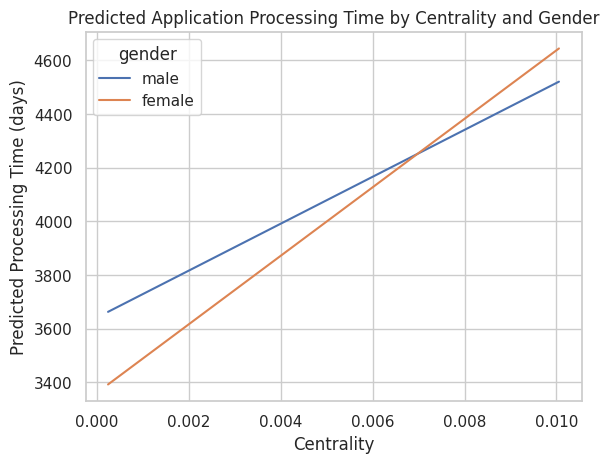

In [ ]:
sns.lineplot(data=pred_df, x='centrality', y='predicted_app_proc_time', hue='gender')
plt.title("Predicted Application Processing Time by Centrality and Gender")
plt.xlabel("Centrality")
plt.ylabel("Predicted Processing Time (days)")
plt.show()


In [ ]:
# Normalize race column
df['race'] = df['race'].str.lower().astype('category')

# Check unique categories
print(df['race'].unique())


['white', 'asian', 'black', 'hispanic']
Categories (4, object): ['asian', 'black', 'hispanic', 'white']


#Regression Analysis: Interaction Effects Between Race and Centrality
This model investigates whether the relationship between network centrality and patent processing time differs by race. Using an interaction term between centrality and race, the regression reveals whether certain racial groups benefit more (or less) from being centrally positioned in the examiner network.

In [ ]:
model_race = smf.ols('app_proc_time ~ centrality * C(race) + tenure + processing_time', data=df).fit()
print(model_race.summary())


                            OLS Regression Results                            
Dep. Variable:          app_proc_time   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     19.43
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           1.40e-26
Time:                        19:13:49   Log-Likelihood:                -3168.4
No. Observations:                 375   AIC:                             6357.
Df Residuals:                     365   BIC:                             6396.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [ ]:
# Get unique races
race_categories = df['race'].cat.categories.tolist()
centrality_range = np.linspace(df['centrality'].min(), df['centrality'].max(), 100)
mean_tenure = df['tenure'].mean()
mean_processing = df['processing_time'].mean()

# Build prediction DataFrame
pred_df_race = pd.DataFrame({
    'centrality': np.repeat(centrality_range, len(race_categories)),
    'race': race_categories * len(centrality_range),
    'tenure': mean_tenure,
    'processing_time': mean_processing
})

# Ensure correct type
pred_df_race['race'] = pred_df_race['race'].astype('category')

# Predict
pred_df_race['predicted_app_proc_time'] = model_race.predict(pred_df_race)


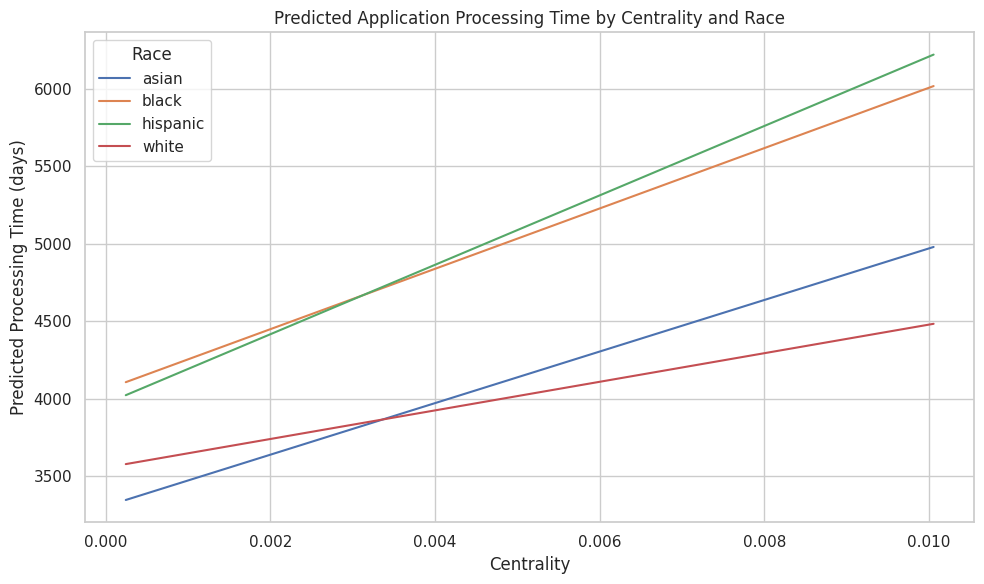

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=pred_df_race, x='centrality', y='predicted_app_proc_time', hue='race')
plt.title("Predicted Application Processing Time by Centrality and Race")
plt.xlabel("Centrality")
plt.ylabel("Predicted Processing Time (days)")
plt.legend(title='Race')
plt.tight_layout()
plt.show()


In [ ]:
# Convert to string, lowercase, and categorical
df['au_group'] = df['au_group'].astype(str).str.lower().astype('category')

# Confirm categories
print(df['au_group'].unique())


['179', '162']
Categories (2, object): ['162', '179']


#Regression Analysis: Moderating Role of AU Group on Centrality and Processing Time
This model evaluates whether the effect of centrality on patent processing time varies across Art Unit (AU) groups. An interaction term between centrality and au_group allows testing whether structural positioning in the examiner network leads to different outcomes depending on the examiner’s organizational unit.

In [ ]:
model_au = smf.ols('app_proc_time ~ centrality * C(au_group) + tenure + processing_time', data=df).fit()
print(model_au.summary())


                            OLS Regression Results                            
Dep. Variable:          app_proc_time   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     36.27
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           3.38e-30
Time:                        19:13:57   Log-Likelihood:                -3166.9
No. Observations:                 375   AIC:                             6346.
Df Residuals:                     369   BIC:                             6369.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [ ]:
# Unique AU groups
au_categories = df['au_group'].cat.categories.tolist()

# Centrality values to span
centrality_range = np.linspace(df['centrality'].min(), df['centrality'].max(), 100)

# Mean values for controls
mean_tenure = df['tenure'].mean()
mean_processing = df['processing_time'].mean()

# Build prediction grid
pred_df_au = pd.DataFrame({
    'centrality': np.repeat(centrality_range, len(au_categories)),
    'au_group': au_categories * len(centrality_range),
    'tenure': mean_tenure,
    'processing_time': mean_processing
})

# Ensure matching types
pred_df_au['au_group'] = pred_df_au['au_group'].astype('category')

# Predict values
pred_df_au['predicted_app_proc_time'] = model_au.predict(pred_df_au)


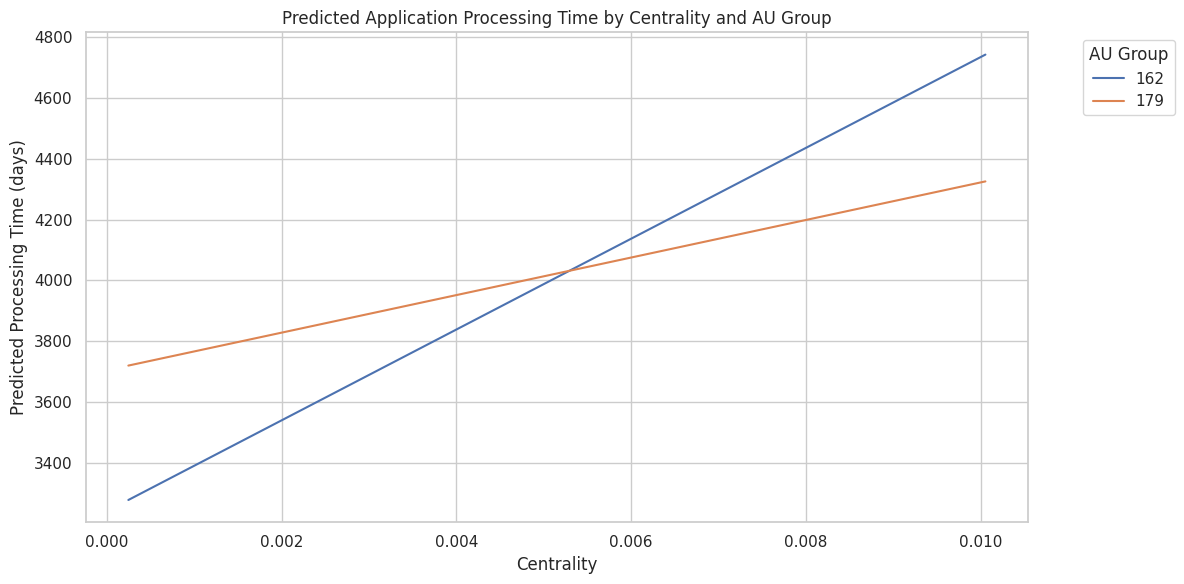

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=pred_df_au, x='centrality', y='predicted_app_proc_time', hue='au_group')
plt.title("Predicted Application Processing Time by Centrality and AU Group")
plt.xlabel("Centrality")
plt.ylabel("Predicted Processing Time (days)")
plt.legend(title='AU Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
